In [11]:
import tensorflow as tf
import urllib.request
import zipfile
import os
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [12]:
tf.test.is_gpu_available()

True

In [13]:
tf.test.is_built_with_cuda()

True

# Data Source

You can download Data from this link https://www.kaggle.com/competitions/dogs-vs-cats/data

# Importing Data 

In [14]:
BASE_DIR = r'C:\Users\alifs\Downloads\cats_and_dogs\cats_and_dogs_filtered'
train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

List Category

In [29]:
os.listdir(train_dir)

['cats', 'dogs']

# Creating  Image Object

In [15]:
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    vertical_flip = True,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator =  train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), class_mode='binary',
    batch_size=20,
)

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), class_mode='binary',
    batch_size=20,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
train_dir

'C:\\Users\\alifs\\Downloads\\cats_and_dogs\\cats_and_dogs_filtered\\train'

# Customing Callback

In [17]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.83 and logs.get('val_acc') > 0.83):
              self.model.stop_training = True
        else:
              self.model.stop_training = False


# Defining model CNN

In [18]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), 
tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.3),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(), 
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'), 
tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                        

In [20]:
custom_cb = CustomCallback()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=10, min_lr=1e-8)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])


# Training Data

In [21]:
history=model.fit(train_generator, steps_per_epoch=100, epochs=20, validation_data = val_generator, verbose = 1, validation_steps=50,
          callbacks=[early_stop, reduce_lr, custom_cb]
          )

Epoch 1/20
100/100 [==============================] - 20s 149ms/step - loss: 1.6189 - acc: 0.5760 - val_loss: 0.6868 - val_acc: 0.6010 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 4s 39ms/step - loss: 0.6415 - acc: 0.6360 - val_loss: 0.6470 - val_acc: 0.6450 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 4s 39ms/step - loss: 0.5952 - acc: 0.6895 - val_loss: 0.6699 - val_acc: 0.5970 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 4s 38ms/step - loss: 0.5799 - acc: 0.6945 - val_loss: 0.6267 - val_acc: 0.6640 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 4s 39ms/step - loss: 0.5621 - acc: 0.7145 - val_loss: 0.6318 - val_acc: 0.6260 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 4s 37ms/step - loss: 0.5294 - acc: 0.7370 - val_loss: 0.5514 - val_acc: 0.7250 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - 4s 35ms/step - loss: 0.5126 - acc: 0.7420 - val_loss: 0.5767 - val_a

# Saving Model

In [22]:
model.save('model_C4.h5')

In [23]:
from keras.models import load_model
model = load_model('model_C4.h5')

# Plotting accuracy and loss

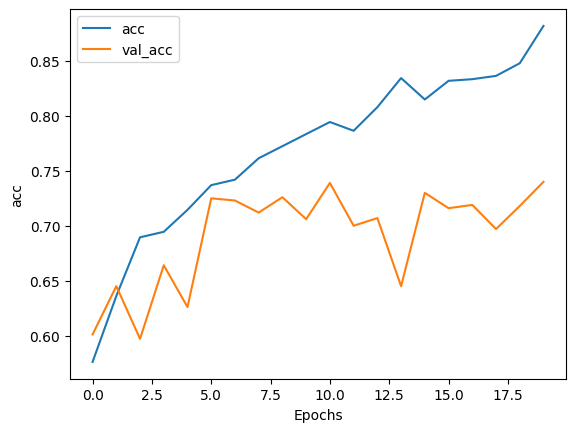

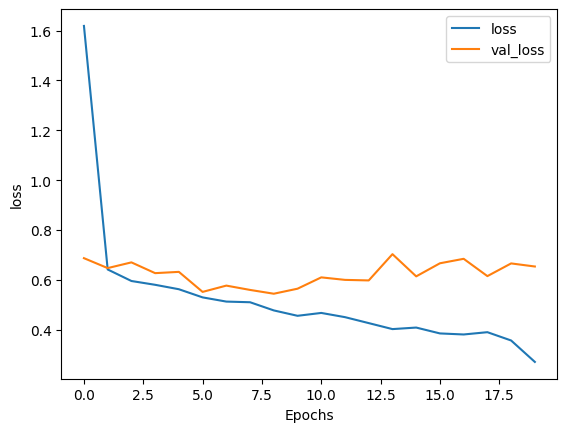

In [24]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "acc")
plot_graphs(history, "loss")

# Predicting New Image

Input Image path

In [25]:
def pred(path):
    image = tf.keras.preprocessing.image.load_img(path,target_size=(150, 150))
    input_arr = numpydata = np.array(image)
    x = np.expand_dims(input_arr, axis=0)
    img_arr  = x /255.
    images = np.vstack([img_arr])
    classes = model.predict(images, batch_size=20)
    imgplot = plt.imshow(image)
    plt.show()
    print(classes)
    if classes < 0.5:
        print('dog')
    else:
        print('cat')

1/1 [==============================] - 0s 342ms/step


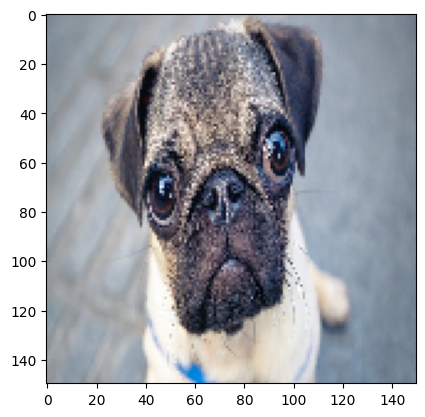

[[0.6052751]]
cat


In [26]:
pred('dog.jpg')


1/1 [==============================] - 0s 18ms/step


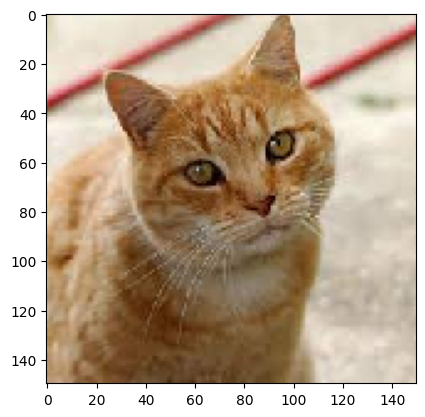

[[0.9452567]]
cat


In [28]:
pred('cat.jfif')